# Travel Insurance Prediction

Final Project Rakamin Data Science Batch 39 by Byte Blazers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 5
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
# Apply the default theme
sns.set_theme()

## Load Data

In [4]:
from google.colab import files
uploaded = files.upload()

Saving TravelInsurancePrediction.csv to TravelInsurancePrediction (1).csv


In [4]:
df = pd.read_csv('TravelInsurancePrediction.csv')
df.sample(5)

Unnamed: 0  Age               Employment Type GraduateOrNot  \
132          132   28  Private Sector/Self Employed           Yes   
1298        1298   27             Government Sector           Yes   
145          145   28  Private Sector/Self Employed           Yes   
1552        1552   28  Private Sector/Self Employed           Yes   
621          621   28  Private Sector/Self Employed           Yes   

      AnnualIncome  FamilyMembers  ChronicDiseases FrequentFlyer  \
132        1100000              4                0            No   
1298        500000              2                1            No   
145        1150000              6                0            No   
1552        750000              2                0            No   
621         650000              4                0            No   

     EverTravelledAbroad  TravelInsurance  
132                   No                0  
1298                  No                1  
145                   No                0  
1552                  No                1  
621                   No                0

## EDA, Insights & Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [6]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

Age               Employment Type GraduateOrNot  AnnualIncome  \
0   31             Government Sector           Yes        400000   
1   31  Private Sector/Self Employed           Yes       1250000   
2   34  Private Sector/Self Employed           Yes        500000   
3   28  Private Sector/Self Employed           Yes        700000   
4   28  Private Sector/Self Employed           Yes        700000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   

   TravelInsurance  
0                0  
1                0  
2                1  
3                0  
4                0

In [7]:
# Pengelompokan berdasarkan jenis numeric dan kategori
cat = ['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad']
num = ['Age', 'AnnualIncome','FamilyMembers','ChronicDiseases','TravelInsurance']

### 1. Descriptive Statistics

In [8]:
df[num].describe()

Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count  1987.000000  1.987000e+03    1987.000000      1987.000000   
mean     29.650226  9.327630e+05       4.752894         0.277806   
std       2.913308  3.768557e+05       1.609650         0.448030   
min      25.000000  3.000000e+05       2.000000         0.000000   
25%      28.000000  6.000000e+05       4.000000         0.000000   
50%      29.000000  9.000000e+05       5.000000         0.000000   
75%      32.000000  1.250000e+06       6.000000         1.000000   
max      35.000000  1.800000e+06       9.000000         1.000000   

       TravelInsurance  
count      1987.000000  
mean          0.357323  
std           0.479332  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000

**Pengamatan Numerical:**

Ada perbedaan antara nilai rata-rata dengan median dari kelima kolom, yaitu `Age`, `AnnualIncome`, `FamilyMembers`, `ChronicDiseases`, dan `TravelInsurance` namun tidak begitu signifikan.

In [9]:
df[cat].describe()

Employment Type GraduateOrNot FrequentFlyer  \
count                           1987          1987          1987   
unique                             2             2             2   
top     Private Sector/Self Employed           Yes            No   
freq                            1417          1692          1570   

       EverTravelledAbroad  
count                 1987  
unique                   2  
top                     No  
freq                  1607

### 2. Univariate Analysis

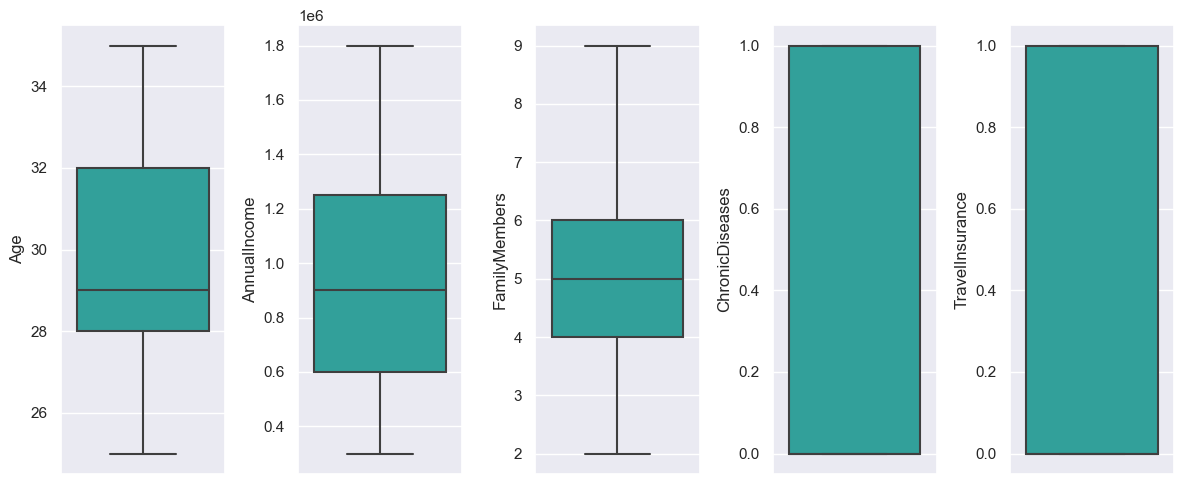

In [10]:
#boxplot

features = num
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='lightseagreen', orient='v')
    plt.tight_layout()

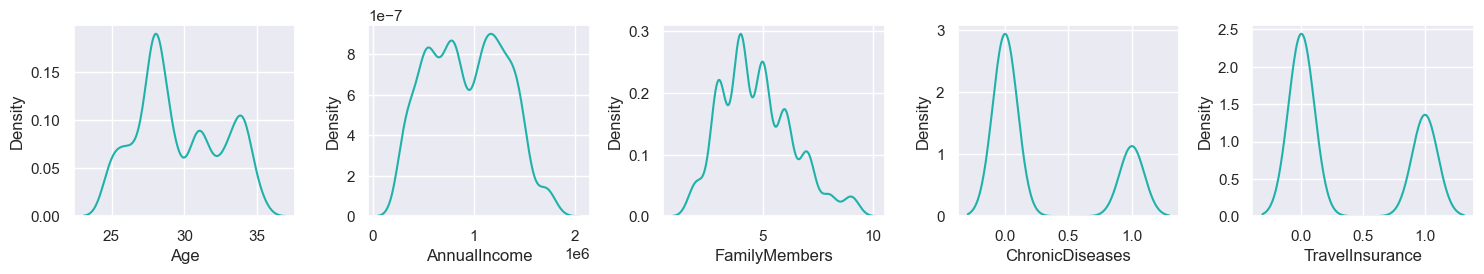

In [11]:
#displot

plt.figure(figsize=(15,5))
for i in range(0, len(num)):
    plt.subplot(2, len(num), i+1)
    sns.kdeplot(x=df[num[i]], color='lightseagreen')
    plt.xlabel(num[i])
    plt.tight_layout()

plt.show()

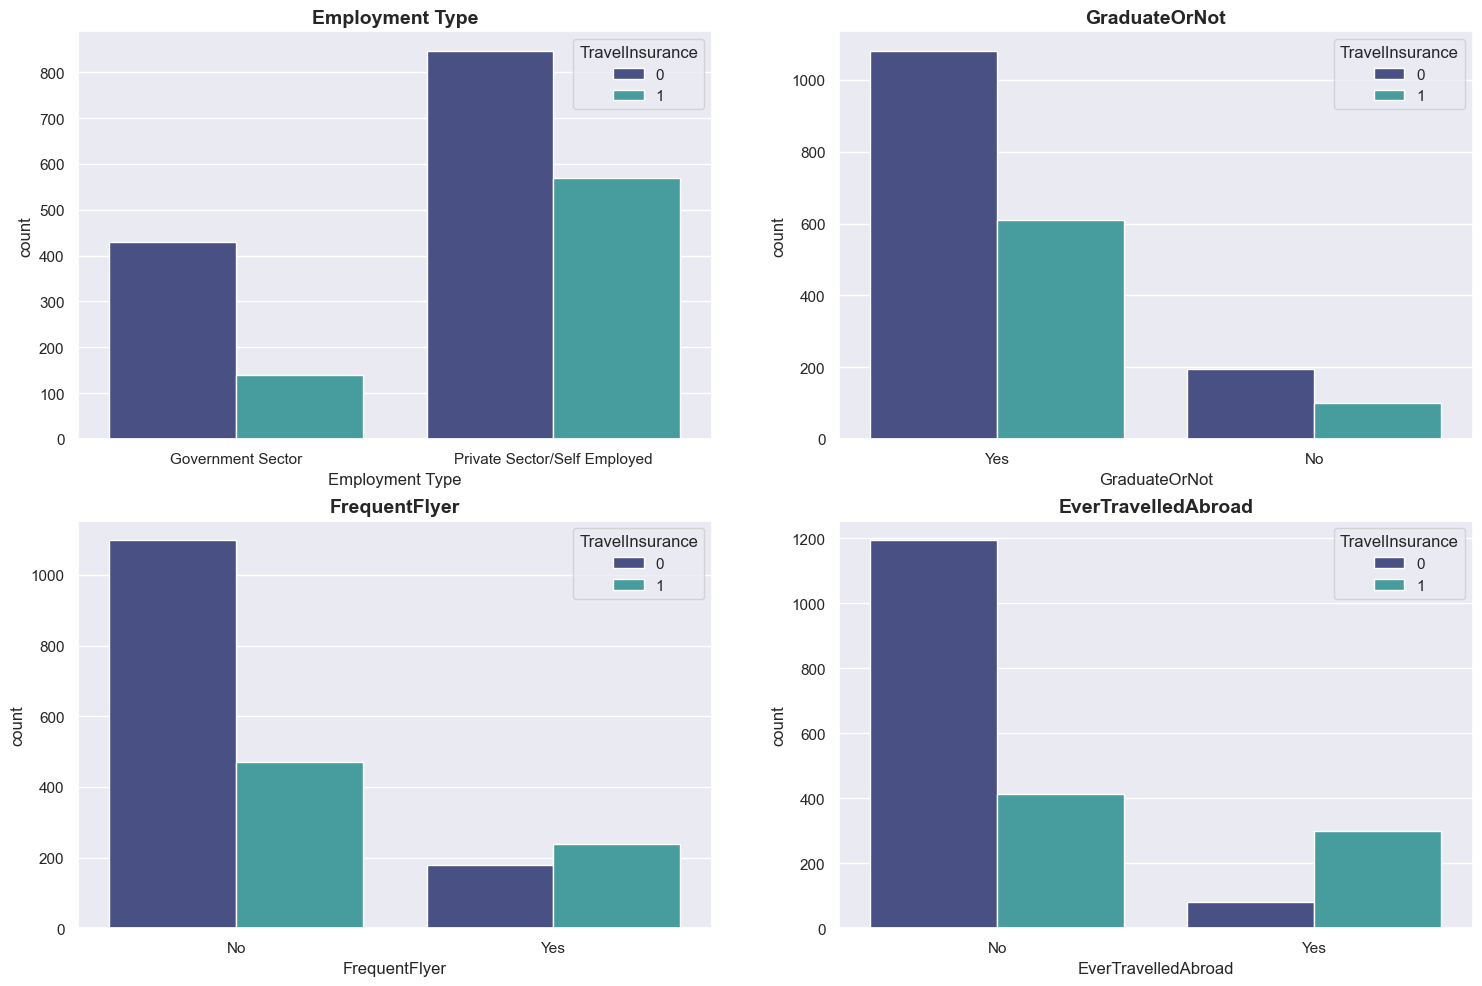

In [12]:
# Categorical
plt.figure(figsize=(18,18))
for i in range(0, len(cat)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[cat[i]], hue = df['TravelInsurance'], palette="mako")
    # Set plot title
    plt.title(cat[i], weight='bold', fontsize = 14)

**Interpretasi Data:**

1. Baik customer yang bekerja di Pemerintahan maupun Swasta cenderung tidak membeli Asuransi Perjalanan. Namun rasio pembelian Asuransi Perjalanan di Sektor Swasta lebih tinggi lebih dari dua kali lipat dibandingkan Pemerintah.
2. Terdapat perbedaan yang signifikan dalam keputusan pembelian Asuransi Perjalanan antara customer yang tamat sarjana dan yang tidak.
3. Not Frequent flyer atau pelanggan yang tidak sering bepergian, memiliki potensi yang lebih tinggi untuk membeli asuransi. Namun, Frequent Flyer masih memiliki potensi untuk membeli asuransi
4. Pelanggan yang pernah bepergian ke luar negeri cenderung membeli Asuransi Perjalanan.

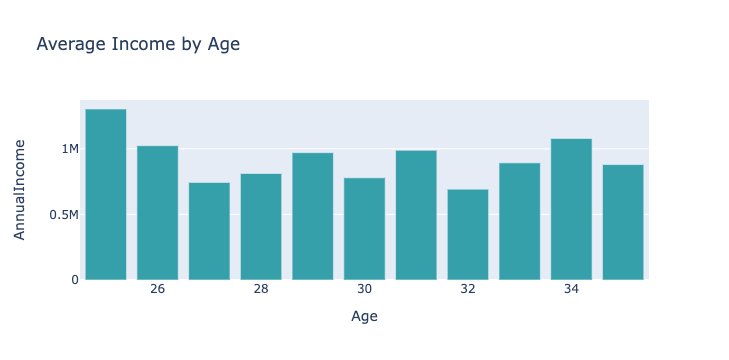

In [13]:
import plotly.express as px

interim_df = df.groupby('Age').mean(numeric_only=True).reset_index()

px.bar(
    interim_df,
    x='Age',
    y='AnnualIncome',
    color_discrete_sequence=['#35A0AA'],
    title='Average Income by Age'
)

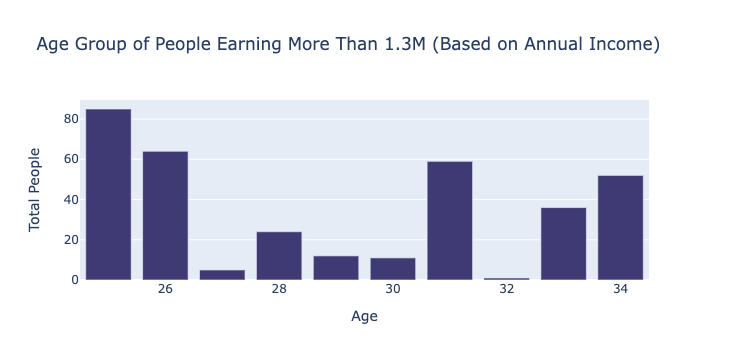

In [14]:
income_greater = df[df['AnnualIncome']>1300000].groupby('Age').size()
income_greater = income_greater.reset_index(name='Total People')
px.bar(income_greater,
         x='Age',
         y='Total People',
         color_discrete_sequence=['#3F3974'],
         title='Age Group of People Earning More Than 1.3M (Based on Annual Income)'
      )

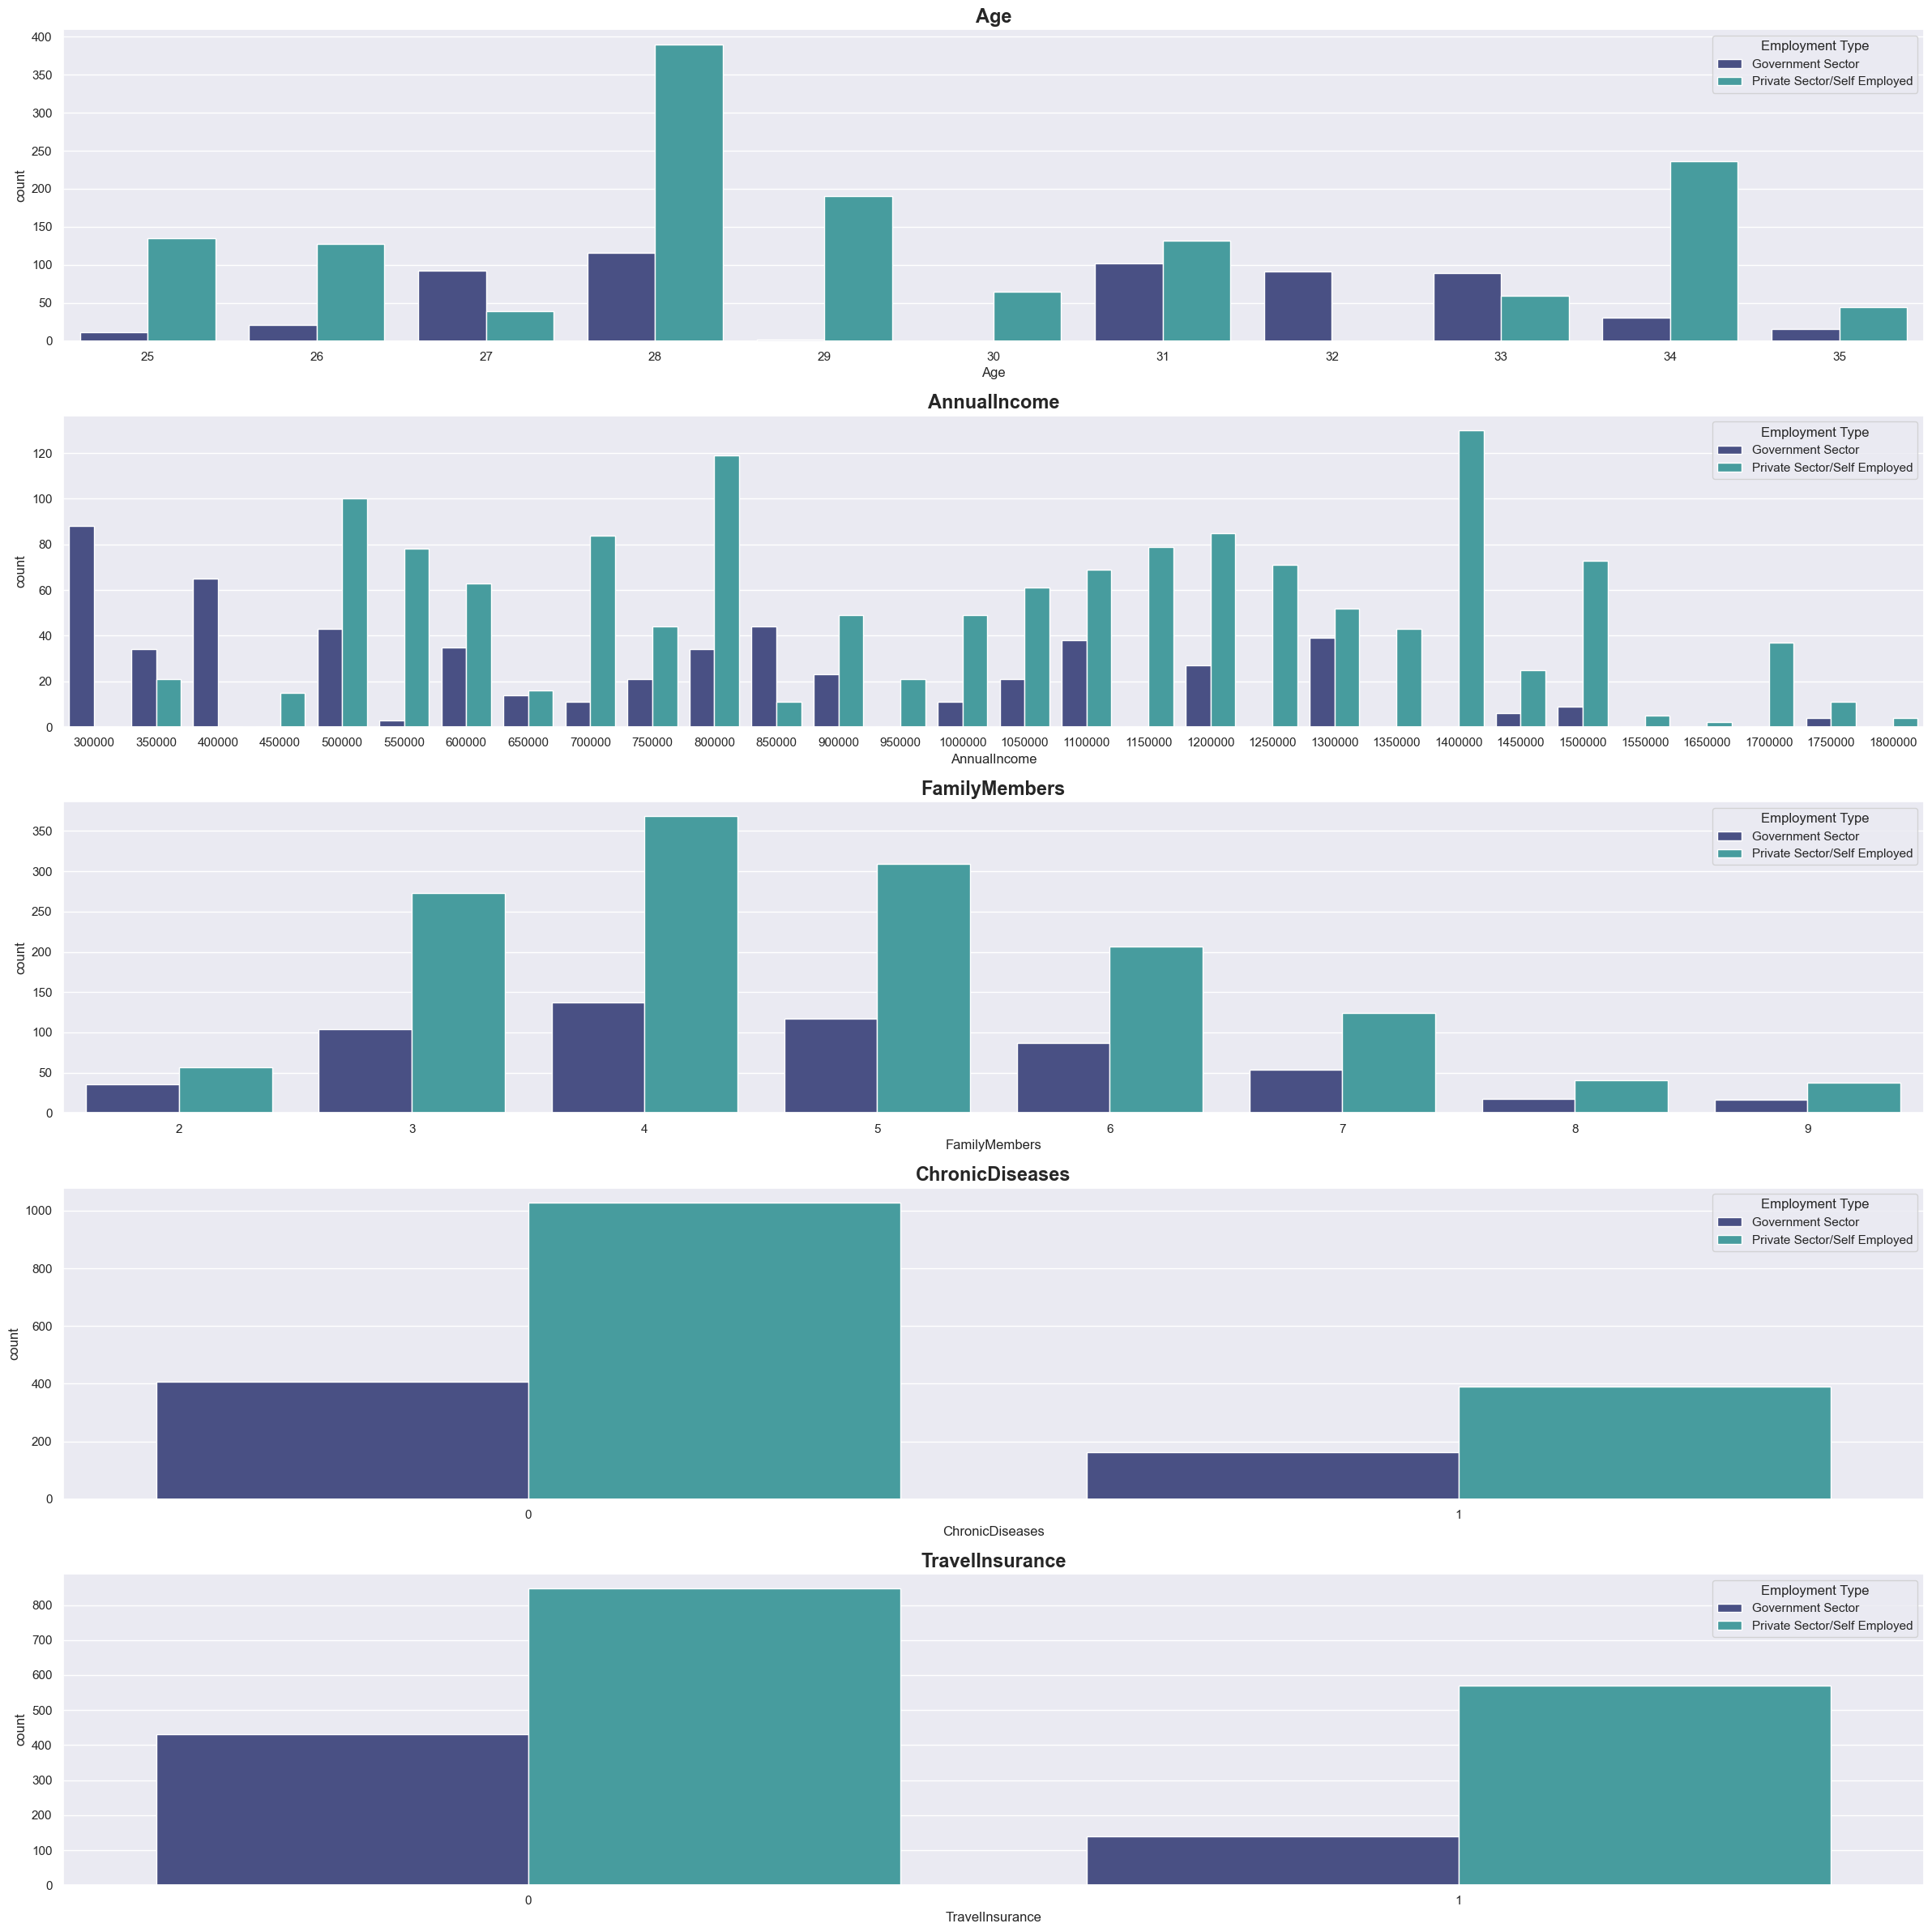

In [15]:
# Numerical
plt.figure(figsize=(24,24))
for i in range(0, len(num)):
    plt.subplot(5,1,i+1)
    sns.countplot(data=df, x=df[num[i]], hue = df['Employment Type'], palette="mako")
    # Set plot title
    plt.title(num[i], weight='bold', fontsize = 17)
    # Rotate x-tick labels 90 degrees
    #plt.xticks(rotation=15)
    plt.tight_layout()

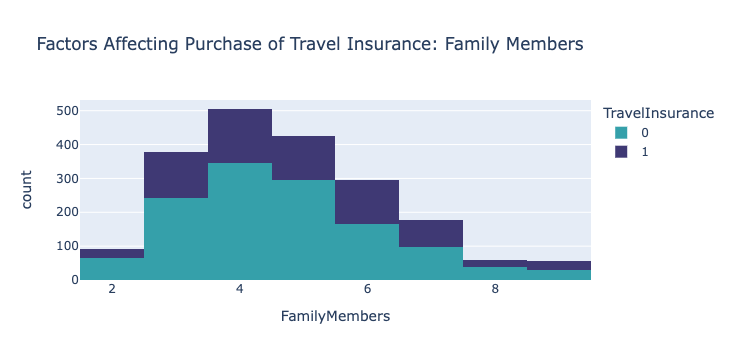

In [16]:
figure = px.histogram(df, x="FamilyMembers", color="TravelInsurance",
                      title="Factors Affecting Purchase of Travel Insurance: Family Members",
                       color_discrete_sequence=['#35A0AA','#3F3974'])

figure.show()

**Interpretasi Data:**

1. Jumlah Family member yang beranggotakan 4 orang kebanyakan membeli asuransi perjalanan, dibandingkan dengan jumlah anggota yang lain.
2. Semakin banyak anggota keluarga, peminat asuransi perjalanan semakin menurun.

### 3. Multivariate Analysis

Analisis Multivariat merupakan metode statistik yang memungkinkan melakukan penelitian terhadap satu atau lebih dari dua variabel secara bersamaan. Untuk melihat korelasi feature kami menggunakan heatmap. Namun, korelasi ini hanya akan berlaku untuk fitur numerik. Untuk fitur kategorikal, kami melakukan encoding terlebih dahulu (dengan one-hot encoding) agar bisa dimasukkan ke dalam perhitungan korelasi.

In [17]:
df_copy = df.copy()

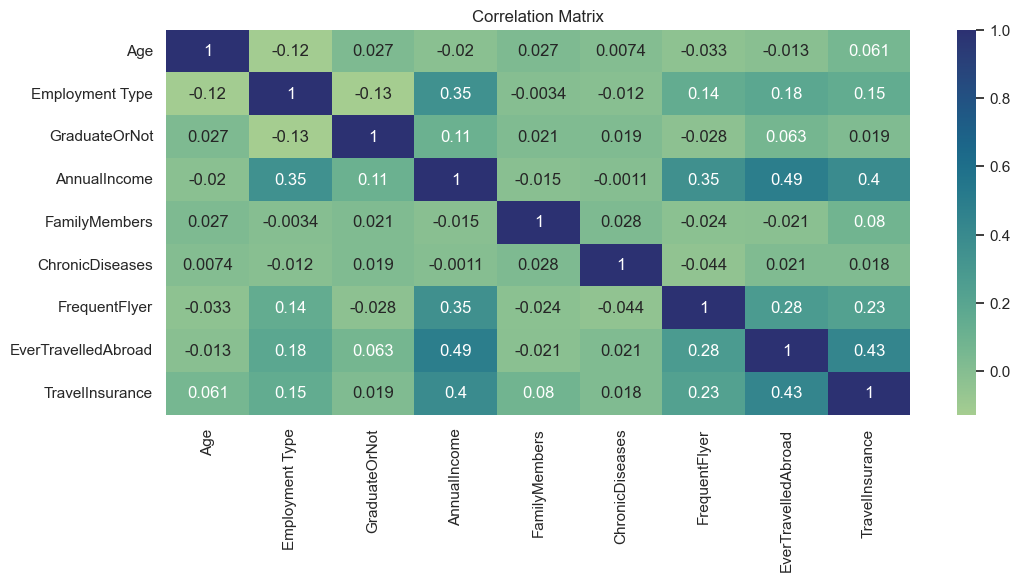

In [18]:
from sklearn.preprocessing import LabelEncoder

object_cols = df_copy.select_dtypes(include=['object']).columns

for col in object_cols:
   encoder = LabelEncoder()
   df_copy[col] = encoder.fit_transform(df_copy[col])

corr = df_copy.corr()
sns.heatmap(corr, annot=True, cmap='crest')
plt.title('Correlation Matrix')
plt.show()

**Dari corelation heat map diatas dapat dilihat bahwa:**

1. `EverTravelledAbroad`(0,43) dan `AnnualIncome` (0.,4) memiliki korelasi positif yang kuat dengan `TravelInsurance`

2. `Age` memiliki korelasi yang lemah dan negatif dengan `AnnualIncome` (-0,02).
3. `AnnualIncome` memiliki korelasi yang lemah dan negatif dengan `ChronicDiseases` (-0,0011).

<Axes: >

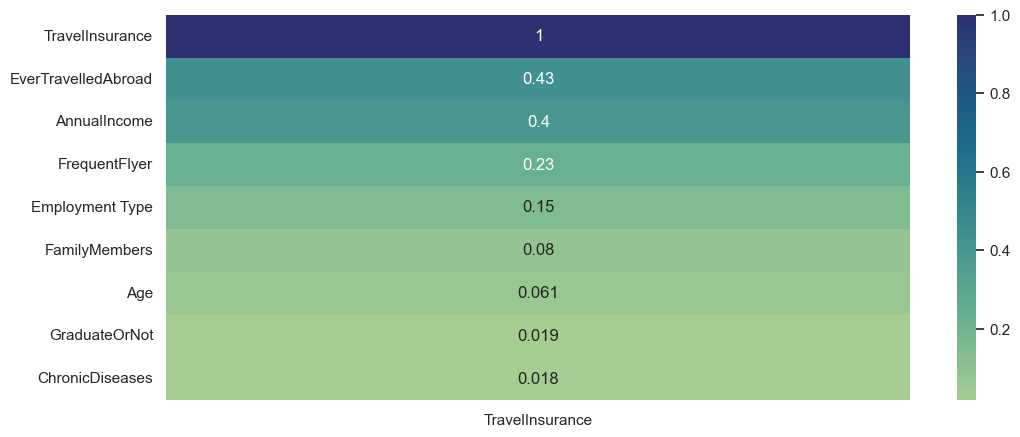

In [19]:
corr=df_copy.corr()["TravelInsurance"]
corr=corr.abs().sort_values(ascending=False).to_frame()
sns.heatmap(data=corr,annot=True, cmap='crest')

<Figure size 1500x1500 with 0 Axes>

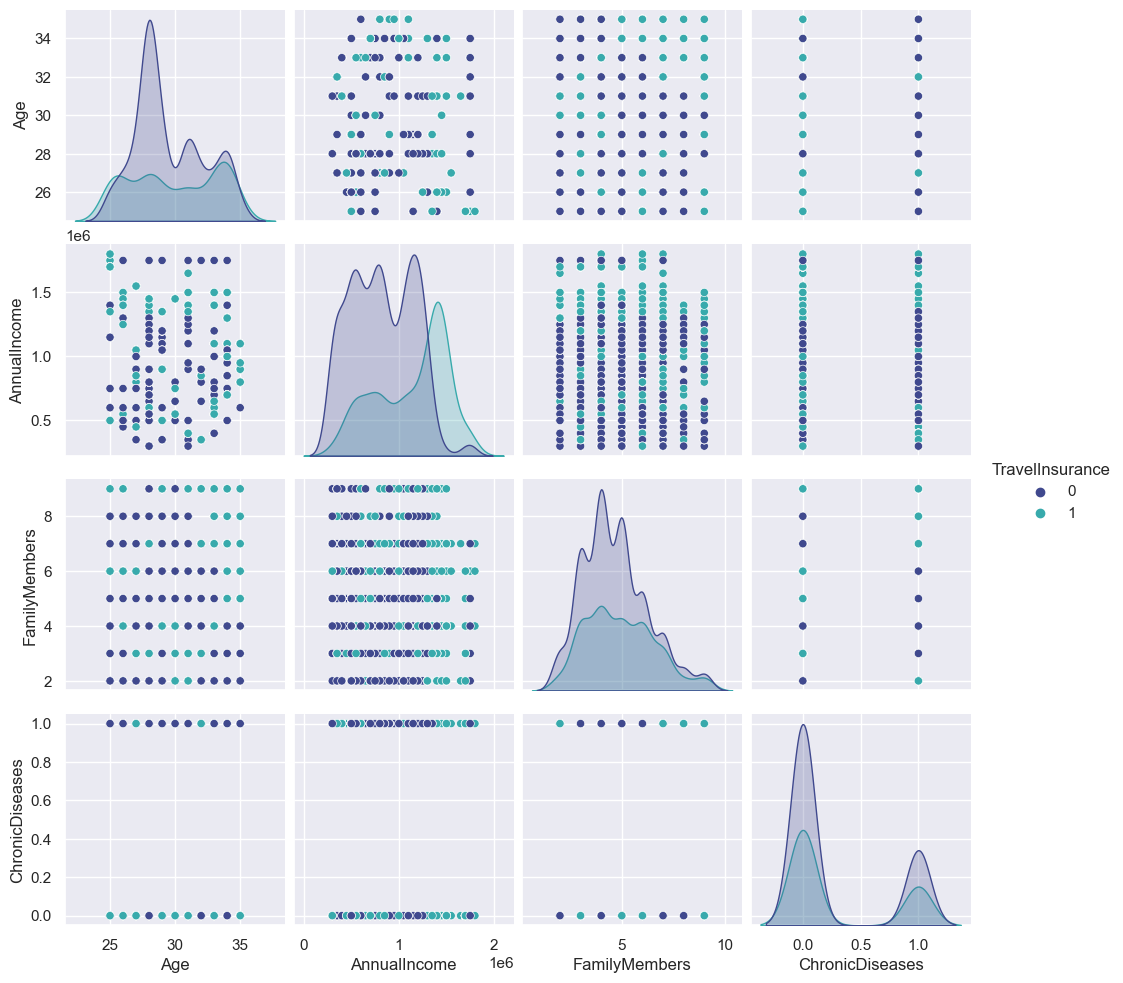

In [20]:
# Pairplot
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='TravelInsurance', palette='mako');

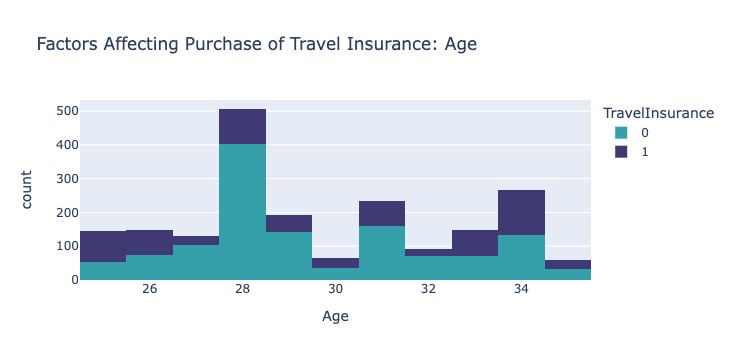

<Figure size 400x400 with 0 Axes>

In [21]:
import plotly.express as px
plt.figure(figsize=(4, 4))
figure=px.histogram(df, x="Age", color= "TravelInsurance",
                    title= "Factors Affecting Purchase of Travel Insurance: Age",
                       color_discrete_sequence=['#35A0AA','#3F3974'])
figure.show()

Pengamatan pengaruh `Age` terhadap purchasing Travel Insurance:

TOP Pelanggan yang sering melakukan pembelian travel insurance berdasarkan umur: <br>
a. Umur 28 <br>
b. Umur 34 <br>
c. Umur 31

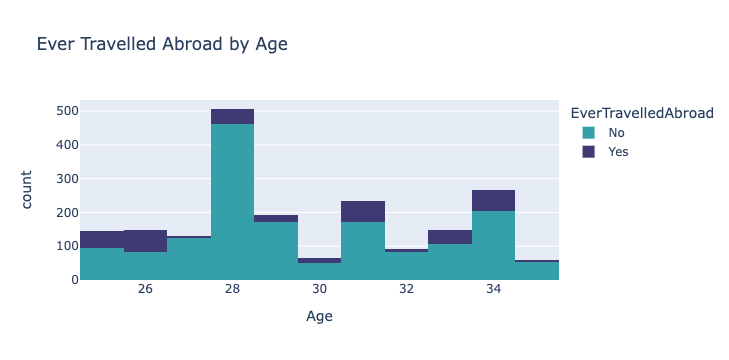

<Figure size 400x400 with 0 Axes>

In [22]:
import plotly.express as px
plt.figure(figsize=(4, 4))
figure=px.histogram(df, x="Age", color= "EverTravelledAbroad",
                    title= "Ever Travelled Abroad by Age",
                       color_discrete_sequence=['#35A0AA','#3F3974'])

figure.show()

Pengamatan pengaruh `Age` terhadap Ever Travelled Abroad

TOP pelanggan yang sering bepergian keluar negeri berdasarkan Umur: <br>
a. Umur 26 <br>
b. Umur 31 <br>
c. Umur 34 <br>

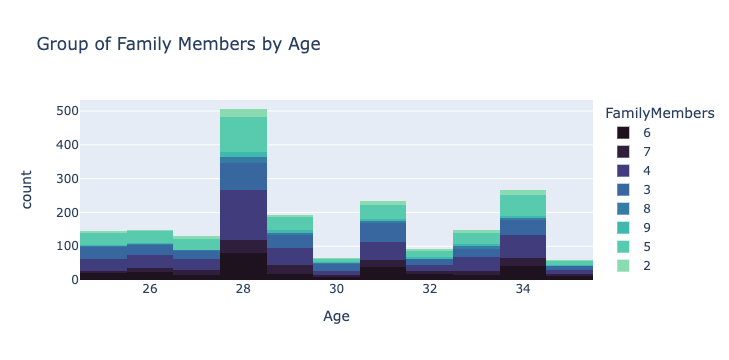

<Figure size 400x400 with 0 Axes>

In [23]:
import plotly.express as px
plt.figure(figsize=(4, 4))
figure=px.histogram(df, x="Age", color= "FamilyMembers",
                    title= "Group of Family Members by Age",
                    color_discrete_sequence=['#1E121F', '#301F3C', '#413C7B', '#38669E', '#357BA4', '#41B8AD', '#58CBAE', '#8ADBB2'])
figure.show()

**Summary**

1. Pekerjaan dan Pembelian Asuransi Perjalanan:

> Customer yang bekerja di sektor swasta cenderung lebih membeli asuransi perjalanan dibandingkan dengan mereka yang bekerja di pemerintahan.
Rasio pembelian asuransi perjalanan di sektor swasta lebih tinggi lebih dari 2 kali lipat dibandingkan dengan sektor pemerintah.
Pendidikan dan Pembelian Asuransi Perjalanan:

2. Terdapat perbedaan yang cukup signifikan dalam keputusan pembelian asuransi perjalanan antara customer yang tamat sarjana dan yang tidak.

3. Pengaruh Penyakit Kronis:

> Tidak terlihat pengaruh signifikan dari keberadaan penyakit kronis terhadap kecenderungan customer untuk membeli asuransi perjalanan.

4. Pelanggan yang bukan frequent flyer (tidak sering bepergian) memiliki potensi lebih tinggi untuk membeli asuransi perjalanan. Meskipun begitu, pelanggan frequent flyer masih memiliki potensi untuk membeli asuransi perjalanan.

5. Perjalanan ke Luar Negeri dan Pembelian Asuransi:

> Customer yang pernah bepergian ke luar negeri cenderung lebih mungkin membeli asuransi perjalanan.

6. Keluarga yang terdiri dari 4 anggota memiliki kecenderungan lebih tinggi untuk membeli asuransi perjalanan dibandingkan dengan jumlah anggota keluarga yang lain. Semakin banyak anggota keluarga, kecenderungan untuk membeli asuransi perjalanan cenderung menurun.

7. Pengaruh Umur

> - Usia 25 memiliki Annual Income tertinggi. Pada umur ini rata-rata customer sedang masuk di tahap berada pada jenjang karir yang sudah dibangun dan berusaha untuk membuat stable secara karir maupun financial. <br>
> - Usia 28 banyak membeli travel insurance dan memiliki banyak family member dibanding umur yang lain. <br>
> - Umur 34 berada pada urutan kedua dalam membeli travel insurance dan memiliki jumlah anggota keluarga terbanyak, dengan annual income tertinggi ke 2. Hal tersebut memungkinkan karena pada rata-rata pada umur 34 tahun sudah berkeluarga dan sudah ditahap financially stable dengan posisi pekerjaannya. <br>
> - Umur 26 memiliki jumlah pembeli travel insurance terbanyak yang pernah berpergian keluar negeri, kedua umur 31 dan 34.

### 4. Insights

1. Perusahaan dapat mempertimbangkan untuk mengarahkan strategi pemasaran asuransi perjalanan lebih khusus ke pelanggan di sektor swasta, mengingat rasio pembelian yang lebih tinggi di sektor ini.
2. Perusahaan dapat menawarkan paket member travel insurance dengan segmen annual income.
3. Perusahaan dapat mempertimbangkan strategi pemasaran yang menawarkan berbagai promo untuk paket wisata dengan menargetkan customer yang tidak sering berpergian dan yang belum pernah berpergian ke luar negeri.
4. Perusahaan dapat menawarkan paket asuransi keluarga khususnya untuk keluarga beranggotakan 4 orang.


## Preprocessing

### 1. Missing Values

In [25]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Tidak ada missing value.

### 2. Duplicate Values

In [26]:
df.duplicated().any()

True

In [27]:
# Menangani Data Duplikat:
duplicate_rows = df[df.duplicated()]

# Menghapus data duplikat
df = df.drop_duplicates()
df.head()

Age               Employment Type GraduateOrNot  AnnualIncome  \
0   31             Government Sector           Yes        400000   
1   31  Private Sector/Self Employed           Yes       1250000   
2   34  Private Sector/Self Employed           Yes        500000   
3   28  Private Sector/Self Employed           Yes        700000   
4   28  Private Sector/Self Employed           Yes        700000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   

   TravelInsurance  
0                0  
1                0  
2                1  
3                0  
4                0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 0 to 1985
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1249 non-null   int64 
 1   Employment Type      1249 non-null   object
 2   GraduateOrNot        1249 non-null   object
 3   AnnualIncome         1249 non-null   int64 
 4   FamilyMembers        1249 non-null   int64 
 5   ChronicDiseases      1249 non-null   int64 
 6   FrequentFlyer        1249 non-null   object
 7   EverTravelledAbroad  1249 non-null   object
 8   TravelInsurance      1249 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 97.6+ KB


Data berkurang menjadi 1249 setelah dilakukan handling duplicate data.

### 3. Handling Outliers

Dari grafik yang kami keluarkan ketika EDA, diketahui bahwa hampir semua kolom numerik memiliki tidak memiliki outlier.

In [29]:
# identifikasi outliers untuk kolom numerik menggunakan IQR

num = ['Age', 'AnnualIncome','FamilyMembers','ChronicDiseases','TravelInsurance']
outliers_count = {}

for col in num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outliers_count[col] = len(outliers)
outliers_count

{'Age': 0,
 'AnnualIncome': 0,
 'FamilyMembers': 0,
 'ChronicDiseases': 0,
 'TravelInsurance': 0}

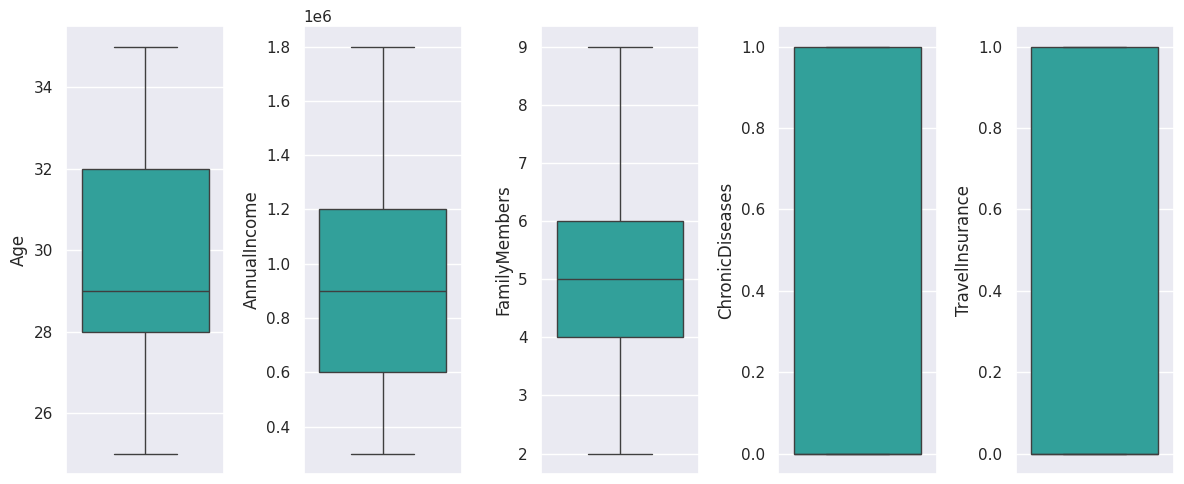

In [30]:
# Boxplot untuk melihat outliers

features = num
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='lightseagreen', orient='v')
    plt.tight_layout()

Berdasarkan boxplot diatas, tidak terdapat outliers.

### 4. Feature Engineering

In [31]:
# Explore AnnualIncome columns
df['AnnualIncome'].describe()

count    1.249000e+03
mean     9.345476e+05
std      3.607293e+05
min      3.000000e+05
25%      6.000000e+05
50%      9.000000e+05
75%      1.200000e+06
max      1.800000e+06
Name: AnnualIncome, dtype: float64

In [32]:
#Menambah Category Income

bins = [0, 600000, 1250000, 1800000] # 0-600.000 -> low / 600.001 - 1.250.000 -> mid / 1.250.001 - 1.800.000 -> high
groupNames = ["low", "mid", "high"]
df['CatAnIncome'] = pd.cut(df['AnnualIncome'], bins, labels = groupNames, include_lowest = True)
df.sample(5)

Age               Employment Type GraduateOrNot  AnnualIncome  \
113    29  Private Sector/Self Employed           Yes        900000   
1539   33  Private Sector/Self Employed           Yes        550000   
1619   25             Government Sector           Yes        750000   
347    34  Private Sector/Self Employed           Yes       1300000   
1289   28  Private Sector/Self Employed           Yes        800000   

      FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
113               4                0           Yes                  No   
1539              7                1           Yes                  No   
1619              6                0            No                  No   
347               6                0           Yes                  No   
1289              2                0            No                  No   

      TravelInsurance CatAnIncome  
113                 0         mid  
1539                1         low  
1619                0         mid  
347                 0        high  
1289                0         mid

<Axes: xlabel='CatAnIncome', ylabel='count'>

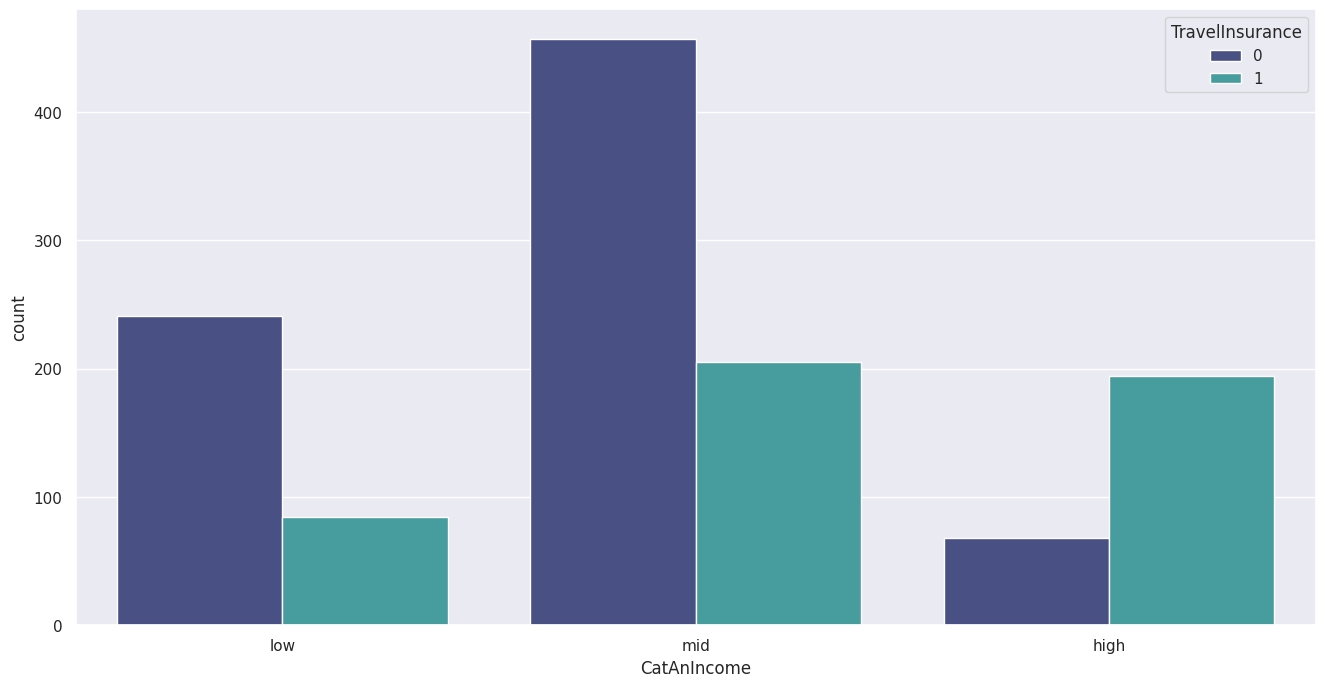

In [33]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x=df['CatAnIncome'], hue=df['TravelInsurance'], palette='mako')

### Feature Encoding

Untuk memudahkan membangun model machine learning di tahap selanjutnya, kami akan melakukan convert 'Yes/No' menjadi 1/0 (binary) pada kolom `GraduateOrNot`, `FrequentFlyer`, `EverTravelledAbroad`

Untuk `CatAnIncome` kami mengubah kategori low, mid dan high ke dalam numeric, yaitu :
- Low = 1
- Mid = 2
- High = 3

Untuk `Employment Type` kami akan mengubah 1/0 (binary) menjadi:
- Governemnt Sector -> 1
- Private Sector -> 0


In [34]:
# Fungsi untuk converting Yes/No menjadi 1/0 (Binary)

def convert_yesno_to_binary(df):
    if df == "Yes":
        return 1
    else:
        return 0

In [35]:
# Converting CatAnIncome ke binary

def convert_catanincome_to_binary(CatAnIncome):
    if CatAnIncome == "low":
        return 1
    elif CatAnIncome == "mid":
      return 2
    else:
        return 3

In [36]:
df['GraduateOrNot'] = df['GraduateOrNot'].apply(convert_yesno_to_binary)
df['FrequentFlyer'] = df['FrequentFlyer'].apply(convert_yesno_to_binary)
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].apply(convert_yesno_to_binary)
df['CatAnIncome'] = df['CatAnIncome'].apply(convert_catanincome_to_binary)

In [37]:
# Converting Employment Type ke binary

def convert_employmenttype_to_binary(employmenttype):
    if employmenttype == "Government Sector":
        return 1
    else:
        return 0

In [38]:
# Converting EmployementType ke Binary
df['Employment Type'] = df['Employment Type'].apply(convert_employmenttype_to_binary)

In [39]:
df = df.drop(columns=['AnnualIncome'])

In [40]:
df.sample(5)

Age  Employment Type  GraduateOrNot  FamilyMembers  ChronicDiseases  \
1974   28                0              1              6                0   
710    26                1              1              3                1   
1940   25                0              1              5                0   
658    30                0              0              6                0   
1188   26                0              1              5                0   

      FrequentFlyer  EverTravelledAbroad  TravelInsurance CatAnIncome  
1974              1                    0                0           2  
710               1                    1                1           3  
1940              1                    1                0           3  
658               1                    1                1           3  
1188              0                    0                0           1

### ENCODING

In [31]:
df.sample(5)

Age               Employment Type GraduateOrNot  AnnualIncome  \
443    25  Private Sector/Self Employed            No       1150000   
378    25  Private Sector/Self Employed           Yes       1700000   
1350   33             Government Sector           Yes        700000   
772    35  Private Sector/Self Employed            No        950000   
458    26  Private Sector/Self Employed           Yes        750000   

      FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
443               6                0            No                  No   
378               5                0           Yes                  No   
1350              3                1            No                  No   
772               3                0            No                  No   
458               3                1            No                  No   

      TravelInsurance  
443                 1  
378                 1  
1350                1  
772                 0  
458                 0

In [32]:
from sklearn.preprocessing import LabelEncoder

object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols:
   encoder = LabelEncoder()
   df[col] = encoder.fit_transform(df[col])

In [33]:
df.head()

Age  Employment Type  GraduateOrNot  AnnualIncome  FamilyMembers  \
0   31                0              1        400000              6   
1   31                1              1       1250000              7   
2   34                1              1        500000              4   
3   28                1              1        700000              3   
4   28                1              1        700000              8   

   ChronicDiseases  FrequentFlyer  EverTravelledAbroad  TravelInsurance  
0                1              0                    0                0  
1                0              0                    0                0  
2                1              0                    0                1  
3                1              0                    0                0  
4                1              1                    0                0

### 5. Class Imbalance

In [34]:
df['TravelInsurance'].value_counts()

0    766
1    483
Name: TravelInsurance, dtype: int64

In [35]:
from sklearn.utils import resample

# memisahkan target menjadi have travel insurance (hti) dan not have travel insurance (not_hti)
df_hti = df[df['TravelInsurance'] == 1]
df_not_hti = df[df['TravelInsurance'] == 0]

In [36]:
# Oversampling pada data have travel insurance
df_hti_oversampled = resample(df_hti, replace=True, n_samples=len(df_not_hti), random_state=42)

# Menggabungkan dataset
df_oversampled = pd.concat([df_not_hti, df_hti_oversampled])

# Distribusi kelas setelah oversampling
distribution_oversampled = df_oversampled['TravelInsurance'].value_counts(normalize=True)

distribution_oversampled

0    0.5
1    0.5
Name: TravelInsurance, dtype: float64

In [37]:
df_oversampled['TravelInsurance'].value_counts()

0    766
1    766
Name: TravelInsurance, dtype: int64

## Modelling

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Membagi predictor dan target variable
y = df_oversampled['TravelInsurance']
X = df_oversampled.drop('TravelInsurance', axis = 1)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    # Menggunakan 'recall' sebagai scoring saat cross-validation
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [42]:
df.TravelInsurance.value_counts(normalize=True)

0    0.613291
1    0.386709
Name: TravelInsurance, dtype: float64

### Train Model

#### Logistic Regression

In [45]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.51
Accuracy (Train Set): 0.50
Precision (Test Set): 0.51
Precision (Train Set): 0.50
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.68
F1-Score (Train Set): 0.66
roc_auc (test-proba): 0.62
roc_auc (train-proba): 0.67
recall (crossval train): 1.0
recall (crossval test): 1.0


#### Random Forest

In [46]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
eval_classification(rf)

Accuracy (Test Set): 0.73
Accuracy (Train Set): 0.93
Precision (Test Set): 0.73
Precision (Train Set): 0.91
Recall (Test Set): 0.75
Recall (Train Set): 0.96
F1-Score (Test Set): 0.74
F1-Score (Train Set): 0.94
roc_auc (test-proba): 0.78
roc_auc (train-proba): 0.99
recall (crossval train): 0.9559420614357761
recall (crossval test): 0.8080808080808082


#### Gradient Boosting

In [48]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
eval_classification(gb)

Accuracy (Test Set): 0.70
Accuracy (Train Set): 0.75
Precision (Test Set): 0.83
Precision (Train Set): 0.86
Recall (Test Set): 0.51
Recall (Train Set): 0.60
F1-Score (Test Set): 0.63
F1-Score (Train Set): 0.71
roc_auc (test-proba): 0.76
roc_auc (train-proba): 0.86
recall (crossval train): 0.6073835950911088
recall (crossval test): 0.569187675070028


#### XG Boosting

In [56]:
#XGBoost

from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set): 0.70
Accuracy (Train Set): 0.91
Precision (Test Set): 0.71
Precision (Train Set): 0.91
Recall (Test Set): 0.71
Recall (Train Set): 0.92
F1-Score (Test Set): 0.71
F1-Score (Train Set): 0.91
roc_auc (test-proba): 0.79
roc_auc (train-proba): 0.98
recall (crossval train): 0.9184110076874689
recall (crossval test): 0.7728121551650963


### Analisis Train Model

Dalam menganalisis performa model, metrik yang relevan untuk mempertimbangkan adalah recall, karena ini adalah masalah klasifikasi dan kami tertarik pada kemampuan model untuk mengidentifikasi positif sebenarnya dari semua kasus positif pada dataset.

XG Boost:
- Model XG Boost memiliki kinerja yang sangat baik dengan recall sekitar 0.71 pada data uji dan 0.92 pada data latih. Hal ini menunjukkan bahwa model mampu mengidentifikasi sebagian besar data positif dengan baik tanpa mengorbankan performa pada data negatif.
- Meskipun terjadi sedikit perbedaan antara performa pada data uji dan data latih, namun perbedaan ini masih dapat diterima.
- Nilai AUC-ROC yang tinggi pada kedua set (sekitar 0.79 pada data uji dan 0.98 pada data latih) menunjukkan bahwa model mampu membedakan antara kelas positif dan negatif dengan baik.

Logistic Regression:
- Model ini mengalami overfitting yang signifikan dengan recall sempurna (1.00) pada kedua data uji dan data latih.
- Performa yang sempurna pada data latih tetapi buruk pada data uji menunjukkan bahwa model tidak dapat melakukan generalisasi dengan baik ke data baru.
- Nilai AUC-ROC yang rendah (sekitar 0.62 pada data uji dan 0.67 pada data latih) menunjukkan bahwa model tidak efektif dalam membedakan antara kelas positif dan negatif.

Random Forest:
- Model Random Forest juga menunjukkan kinerja yang baik dengan recall sekitar 0.75 pada data uji dan 0.96 pada data latih.
- Terdapat sedikit perbedaan antara performa pada data uji dan data latih, namun perbedaan ini masih dapat diterima.
- Nilai AUC-ROC yang tinggi (sekitar 0.78 pada data uji dan 0.99 pada data latih) menunjukkan kemampuan model dalam membedakan antara kelas positif dan negatif.

Gradient Boosting:
- Model Gradient Boosting memiliki recall sekitar 0.51 pada data uji dan 0.60 pada data latih.
- Terdapat perbedaan yang cukup signifikan antara performa pada data uji dan data latih, menunjukkan adanya overfitting.
- Meskipun nilai AUC-ROC masih cukup tinggi (sekitar 0.76 pada data uji dan 0.86 pada data latih), namun performa model ini tidak sebaik model XG Boost dan Random Forest dalam membedakan antara kelas positif dan negatif.

Kesimpulan: Berdasarkan metrik recall, **model XG Boost dan Random Forest menunjukkan kinerja yang lebih baik** dibandingkan dengan Logistic Regression dan Gradient Boosting. Model XG Boost memiliki kinerja yang konsisten dan tinggi pada kedua data uji dan data latih, sementara Random Forest juga menunjukkan kinerja yang baik dengan sedikit perbedaan antara kedua dataset. Kedua model ini dapat dianggap sebagai kandidat terbaik untuk digunakan dalam pengklasifikasi data ini.

### Hypertuning Parameter

#### Logistic Regression

In [49]:
#LogReg

from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 300]
}

# Create logistic regression model
logreg = LogisticRegression()

# Perform grid search
cv = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=3)
cv.fit(X_train, y_train)

# Get best parameters
best_params = cv.best_params_
print('The best parameters are:', best_params)


The best parameters are: {'C': 10, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}


In [50]:
# Tuned parameters
tuned_logreg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=100)
tuned_logreg.fit(X_train, y_train)
y_pred = tuned_logreg.predict(X_test)
eval_classification(tuned_logreg)

Accuracy (Test Set): 0.51
Accuracy (Train Set): 0.50
Precision (Test Set): 0.51
Precision (Train Set): 0.50
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.68
F1-Score (Train Set): 0.66
roc_auc (test-proba): 0.62
roc_auc (train-proba): 0.67
recall (crossval train): 1.0
recall (crossval test): 1.0


#### Random Forest

In [51]:
# Random Forest

param_grid = {
    'bootstrap': [True],
    'max_depth': [100, 200, 300],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 200, 300]
}

cv = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)
cv.fit(X_train, y_train)
best_params = cv.best_params_
print('The best params are:',best_params)

The best params are: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}


In [52]:
tuned_rf = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=100, max_features=2,
                                  min_samples_leaf=3, min_samples_split=10, n_estimators=100)
tuned_rf.fit(X_train, y_train)
y_pred = tuned_rf.predict(X_test)
eval_classification(tuned_rf)

Accuracy (Test Set): 0.71
Accuracy (Train Set): 0.83
Precision (Test Set): 0.76
Precision (Train Set): 0.87
Recall (Test Set): 0.62
Recall (Train Set): 0.77
F1-Score (Test Set): 0.68
F1-Score (Train Set): 0.82
roc_auc (test-proba): 0.79
roc_auc (train-proba): 0.92
recall (crossval train): 0.7894902387273561
recall (crossval test): 0.6722689075630252


#### Gradient Boosting

In [53]:
# Gradient Boosting

from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators":[1,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3)
cv.fit(X_train,y_train)
best_params = cv.best_params_
print('The best params are:',best_params)

The best params are: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500}


In [54]:
tuned_gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=250)
tuned_gb.fit(X_train, y_train)
y_pred = tuned_gb.predict(X_test)
eval_classification(tuned_gb)

Accuracy (Test Set): 0.70
Accuracy (Train Set): 0.75
Precision (Test Set): 0.85
Precision (Train Set): 0.88
Recall (Test Set): 0.50
Recall (Train Set): 0.58
F1-Score (Test Set): 0.63
F1-Score (Train Set): 0.70
roc_auc (test-proba): 0.77
roc_auc (train-proba): 0.88
recall (crossval train): 0.5776828839202892
recall (crossval test): 0.5496052966641202


XG Boost

In [55]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.70
Accuracy (Train Set): 0.84
Precision (Test Set): 0.73
Precision (Train Set): 0.86
Recall (Test Set): 0.66
Recall (Train Set): 0.82
F1-Score (Test Set): 0.69
F1-Score (Train Set): 0.84
roc_auc (test-proba): 0.78
roc_auc (train-proba): 0.92
recall (crossval train): 0.8211448037616351
recall (crossval test): 0.7153976742212036


### Analisis Hyperparameter Tuning

Setelah melakukan hypertuning parameter pada model Logistic Regression, Random Forest, Gradient Boosting dan XG Boost berikut analisa yang kami dapatkan:

Logistic Regression:
- Setelah dilakukan hyperparameter tuning, kinerja model Logistic Regression tidak mengalami perbaikan yang signifikan. Masih terjadi overfitting dengan recall sempurna (1.00) pada kedua data uji dan data latih.
- Performa model pada data uji sangat buruk, menunjukkan bahwa model tidak dapat melakukan generalisasi dengan baik ke data baru.

Random Forest:
- Model Random Forest menunjukkan peningkatan kinerja setelah hyperparameter tuning, dengan recall sekitar 0.62 pada data uji dan 0.77 pada data latih.
- Terdapat sedikit perbedaan antara performa pada data uji dan data latih, namun perbedaan ini masih dapat diterima.
Meskipun terdapat peningkatan dalam recall, masih terdapat ruang untuk perbaikan lebih lanjut.

Gradient Boosting:
- Model Gradient Boosting juga menunjukkan peningkatan kinerja setelah hyperparameter tuning, dengan recall sekitar 0.50 pada data uji dan 0.58 pada data latih.
- Terdapat sedikit perbedaan antara performa pada data uji dan data latih, namun perbedaan ini masih dapat diterima.
Meskipun terdapat peningkatan dalam recall, performa model ini masih cukup rendah dibandingkan dengan model lainnya.

XG Boost:
- Model XG Boost menunjukkan peningkatan kinerja setelah hyperparameter tuning, dengan recall sekitar 0.66 pada data uji dan 0.82 pada data latih.
- Terdapat sedikit perbedaan antara performa pada data uji dan data latih, namun perbedaan ini masih dapat diterima.
Meskipun terdapat peningkatan dalam recall, performa model ini masih kalah dengan Random Forest.

**Kesimpulan:**
Setelah hyperparameter tuning, model Random Forest dan XG Boost menunjukkan kinerja yang lebih baik dalam hal recall dibandingkan dengan model Logistic Regression dan Gradient Boosting. Namun, Random Forest menunjukkan performa yang lebih stabil dan sedikit overfitting dibandingkan dengan XG Boost. Oleh karena itu, **Random Forest dapat dianggap sebagai model terbaik untuk digunakan dalam pengklasifikasi data ini.**

### Classification Report, Accuracy Score, and Confusion Matrix

In [57]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

tuned_rf = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=100, max_features=2,
                                  min_samples_leaf=3, min_samples_split=10, n_estimators=100)

tuned_rf.fit(X_train, y_train)

# Training set predictions
y_train_pred = tuned_rf.predict(X_train)

# Test set predictions
y_test_pred = tuned_rf.predict(X_test)

In [58]:
# Evaluation on training set
print("Training Set Metrics:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

# Evaluation on test set
print("\nTest Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Set Metrics:
Accuracy: 0.8283582089552238
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       541
           1       0.87      0.76      0.82       531

    accuracy                           0.83      1072
   macro avg       0.83      0.83      0.83      1072
weighted avg       0.83      0.83      0.83      1072

Confusion Matrix:
 [[482  59]
 [125 406]]

Test Set Metrics:
Accuracy: 0.7021739130434783
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.80      0.72       225
           1       0.76      0.61      0.68       235

    accuracy                           0.70       460
   macro avg       0.71      0.70      0.70       460
weighted avg       0.71      0.70      0.70       460

Confusion Matrix:
 [[179  46]
 [ 91 144]]


Dari hasil classification_report, accuracy_score, dan confusion_matrix yang diberikan, kita bisa mendapatkan beberapa analisis dan kesimpulan:

Training Set Metrics:
- Akurasi pada set pelatihan adalah sekitar 82.8%, yang menunjukkan bahwa model cenderung melakukan prediksi dengan benar sekitar 82.8% dari waktu.
- Precision untuk kelas 0 (tidak membeli) adalah 0.79, sedangkan untuk kelas 1 (membeli) adalah 0.87. Precision mengukur proporsi dari hasil positif yang benar-benar benar.
- Recall untuk kelas 0 adalah 0.89, sedangkan untuk kelas 1 adalah 0.76. Recall mengukur proporsi hasil positif yang diidentifikasi dengan benar dari total hasil positif yang sebenarnya.
- F1-score, yang merupakan harmonic mean dari precision dan recall, adalah 0.84 untuk kelas 0 dan 0.82 untuk kelas 1.
- Confusion matrix menunjukkan bahwa ada 482 prediksi yang benar untuk kelas 0, 406 prediksi yang benar untuk kelas 1, 59 prediksi yang salah untuk kelas 0, dan 125 prediksi yang salah untuk kelas 1 pada set pelatihan.

Test Set Metrics:
- Akurasi pada set pengujian adalah sekitar 70.2%, yang menunjukkan bahwa model cenderung melakukan prediksi dengan benar sekitar 70.2% dari waktu pada data yang tidak pernah dilihat sebelumnya.
- Precision untuk kelas 0 adalah 0.66, sedangkan untuk kelas 1 adalah 0.76.
- Recall untuk kelas 0 adalah 0.80, sedangkan untuk kelas 1 adalah 0.61.
- F1-score untuk kelas 0 adalah 0.72, sedangkan untuk kelas 1 adalah 0.68.
- Confusion matrix menunjukkan bahwa ada 179 prediksi yang benar untuk kelas 0, 144 prediksi yang benar untuk kelas 1, 46 prediksi yang salah untuk kelas 0, dan 91 prediksi yang salah untuk kelas 1 pada set pengujian.

#### Kesimpulan:

1. **Kinerja Model**: Model memiliki kinerja yang cukup baik, dengan akurasi yang relatif tinggi dan F1-score yang seimbang untuk kedua kelas pada data latih dan data uji.

2. **Ketidakseimbangan Kelas**: Terdapat sedikit ketidakseimbangan dalam kinerja model antara kelas 0 dan kelas 1, terutama dalam hal recall. Model cenderung lebih baik dalam mengidentifikasi kelas 0 daripada kelas 1.

3. **Generalisasi**: Model memiliki kemampuan yang baik dalam menggeneralisasi pada data baru, meskipun terdapat sedikit penurunan performa pada data uji dibandingkan dengan data latih. Hal ini bisa menjadi indikasi adanya overfitting atau perbedaan karakteristik antara data latih dan data uji.

4. **Optimasi Model**: Meskipun model sudah memberikan kinerja yang baik, masih ada ruang untuk melakukan optimasi lebih lanjut, terutama dalam menyeimbangkan recall antara kedua kelas dan meminimalkan jumlah prediksi salah (False Positive dan False Negative). Ini dapat dilakukan melalui penyesuaian parameter model, peningkatan jumlah data latih, atau teknik pemrosesan data yang lebih canggih.

<ipython-input-59-08b702aa6add>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




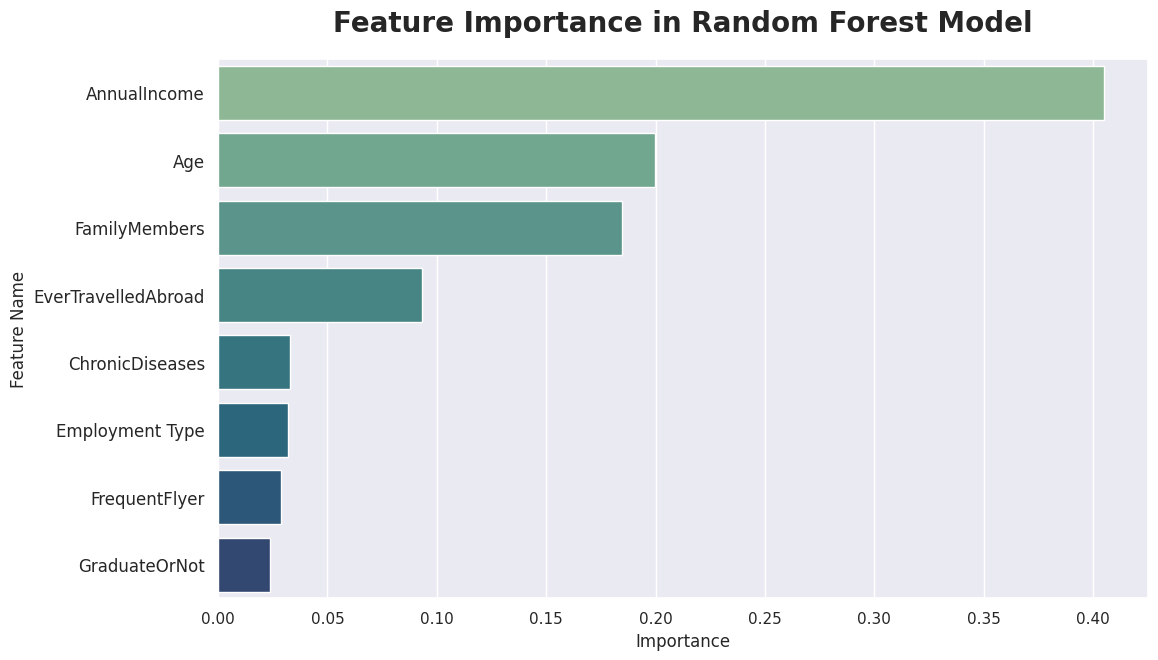

In [59]:
importance_df = pd.DataFrame({"Feature Name":X_train.columns,
                       "Importance":tuned_rf.feature_importances_})
features = importance_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="crest")
plt.title("Feature Importance in Random Forest Model", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

Berdasarkan feature importance score diatas, dapat dilihat feature AnnualIncome, Age, dan FamilyMembers merupakan top feature importance yang dapat kita jadikan fokus untuk mendapatkan hasil prediksi yang akan membeli asuransi travel pada model Random Forest ini. Feature lain seperti EverTravelledAbroad, FrequentFlyer, Employment Type, ChronicDisease, dan GraduateOrNot mempunyai score feature importance yang rendah. Selanjutnya feature ini dapat dilakukan landasan untuk feature selection pada iterasi selanjutnya.

param value: 1; train: 0.8875573935412904; test: 0.675725768321513
param value: 2; train: 0.9431703861510558; test: 0.6988274231678486
param value: 3; train: 0.9595538707352989; test: 0.7356595744680852
param value: 4; train: 0.9688377873158098; test: 0.7419196217494091
param value: 5; train: 0.9742420919619453; test: 0.7565200945626478
param value: 6; train: 0.977317585137379; test: 0.7682458628841609
param value: 7; train: 0.976858088703698; test: 0.7746572104018913
param value: 8; train: 0.979710795729468; test: 0.7714326241134749
param value: 9; train: 0.980565389475443; test: 0.7555555555555555
param value: 10; train: 0.9827671432201649; test: 0.7762836879432624


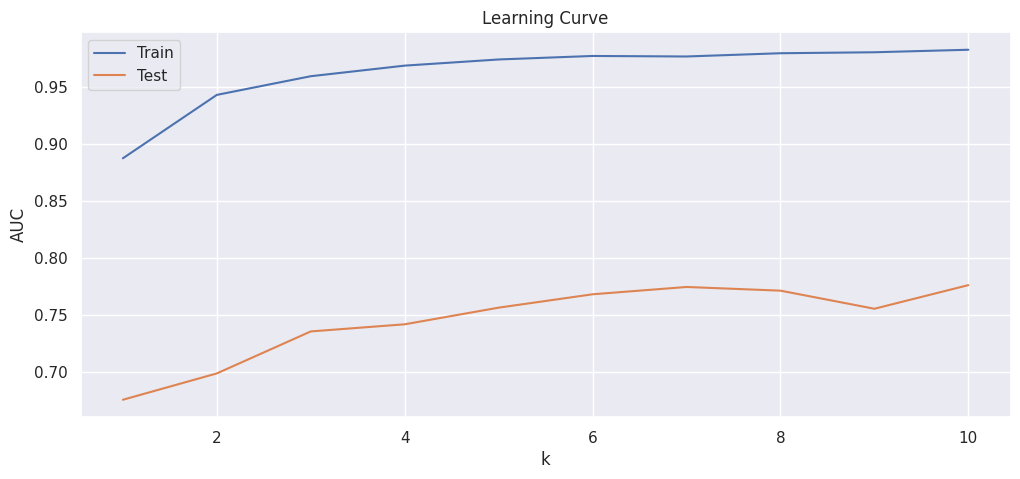

In [60]:
# Analyzing Learning Curve
import numpy as np
from matplotlib import pyplot as plt

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = RandomForestClassifier(n_estimators=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 10, 10)]
draw_learning_curve(param_values)